### Introduction
MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

We aim to correctly identify digits from a dataset of tens of thousands of handwritten images. 
we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with
the digit it represents.

In [1]:
# import important packages required for the project

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

%matplotlib inline


In [2]:
# fetch the data for MNIST 

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

D:\Workspace\MachineLearning\Installation\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\Workspace\MachineLearning\Installation\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# check the data 
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
# lets assign the data to our X and y variable

X , y = mnist['data'], mnist['target']


In [5]:
# check the shape of data sets
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


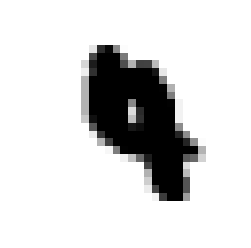

In [6]:
some_digit = X[65000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap = mp.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y[65000]

4.0

In [8]:
# before performing any other operation lets devide the training and testing sets.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



In [9]:
# as the data is in order so we have to shuffle it, as the machine learning algorith are sensitive to the order of the data

shuffle_index = np.random.permutation(60000)
X_train , y_train = X_train[shuffle_index], y_train[shuffle_index]


In [10]:
# lets create  Random Forest Model as its not binary classification , its multilabel classification.

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)




In [11]:
# lets run the KFold cross validation and check the accuracy 

from sklearn.model_selection import cross_val_score

cross_val_score(rf_classifier,X_train,y_train,cv=6, n_jobs=4, scoring='accuracy')


array([0.94902549, 0.94181164, 0.94560544, 0.94269427, 0.94768431,
       0.94387755])

In [12]:
# Its laoks like our model has accuracy of around 94 percent. 
# Lets try to look for confusion matrix as well.  for the we need to use cross_val_predict function 

from sklearn.model_selection import cross_val_predict

x_train_predict = cross_val_predict(rf_classifier,X_train,y_train,cv=6,n_jobs=4)


In [13]:
# lets check the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, x_train_predict)
conf_matrix


array([[5835,    1,   16,   11,    8,   10,   19,    0,   19,    4],
       [   4, 6633,   29,   22,    8,    7,    5,   11,   17,    6],
       [  36,   30, 5657,   52,   33,   14,   25,   46,   52,   13],
       [  28,   17,  125, 5651,   12,  127,    8,   56,   73,   34],
       [  20,   15,   25,    7, 5571,    5,   31,   18,   22,  128],
       [  47,   17,   15,  163,   26, 5018,   50,    9,   46,   30],
       [  47,   13,   29,    2,   27,   58, 5710,    1,   28,    3],
       [  12,   31,   79,   18,   67,    5,    2, 5932,   20,   99],
       [  43,   54,   97,  128,   48,   82,   31,   14, 5278,   76],
       [  29,   18,   26,   87,  176,   50,    8,   72,   61, 5422]],
      dtype=int64)

In [14]:
# lets check the precisoin and recall

from sklearn.metrics import precision_score, recall_score

print("Precision score = ",precision_score(y_train,x_train_predict,average='weighted'))

print("recall score = ", recall_score(y_train,x_train_predict,average='weighted'))


Precision score =  0.9451046147312009
recall score =  0.9451166666666667


In [15]:
# we can check f1 score as well 

from sklearn.metrics import f1_score

f1_score(y_train, x_train_predict,average='weighted')

0.9450018199322064

In [16]:
fig_size = plt.rcParams['figure.figsize']
print("current fig size = " , fig_size)

fig_size[0] = 20
fig_size[1] = 10 
plt.rcParams['figure.figsize'] = fig_size

current fig size =  [6.0, 4.0]


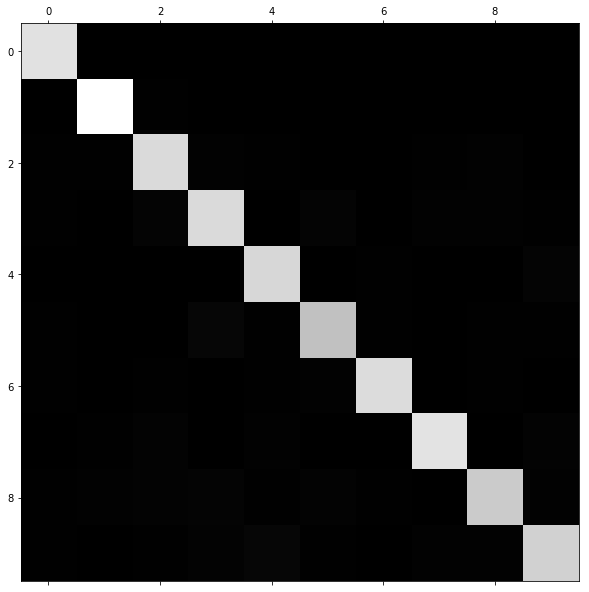

In [17]:
# lets try to analyze errors 

plt.matshow(conf_matrix, cmap=plt.cm.gray)



In [18]:
# find the row sum 
row_sums = conf_matrix.sum(axis=1,keepdims= True)
norm_conf_mx = conf_matrix / row_sums

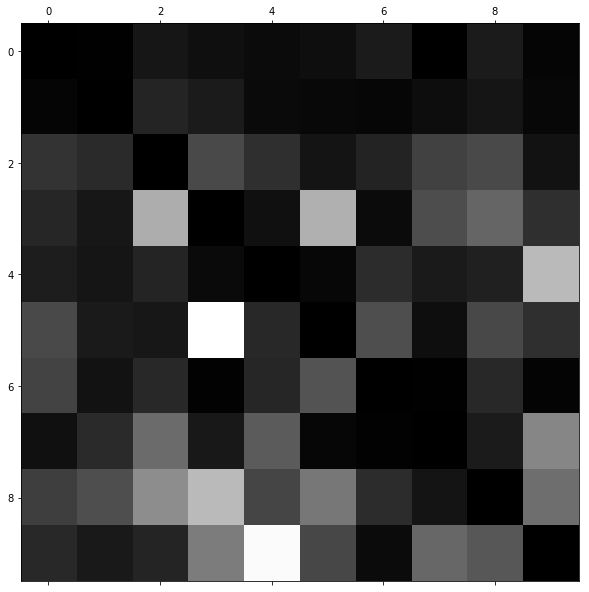

In [19]:
# lets draw again and set the diagonal as zero as those are correcty classified

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [20]:
rf_classifier.fit(X_train,y_train)



D:\Workspace\MachineLearning\Installation\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
y_pred = rf_classifier.predict(X_train)

In [22]:
confusion_matrix(y_train,y_pred)

array([[5922,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 5956,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    5, 6124,    0,    0,    0,    1,    1,    0],
       [   1,    1,    0,    1, 5833,    0,    1,    1,    0,    4],
       [   0,    0,    0,    1,    1, 5418,    1,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0, 5917,    0,    0,    0],
       [   1,    0,    2,    0,    0,    0,    0, 6259,    0,    3],
       [   0,    2,    2,    3,    1,    1,    0,    1, 5840,    1],
       [   1,    0,    3,    1,    1,    2,    1,    0,    1, 5939]],
      dtype=int64)

In [23]:
# check accuracy of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_train , y_pred)

0.9991666666666666

In [ ]:
#  Thus we got 99 % from the model then we can freeze the model


In [24]:
#Now its time to run the model on testing set and get the accuracy score and confusion matrix

y_pred_test = rf_classifier.predict(X_test)

In [25]:
confusion_matrix(y_test, y_pred_test)

array([[ 965,    0,    4,    1,    0,    3,    3,    1,    3,    0],
       [   0, 1122,    4,    4,    0,    0,    4,    0,    1,    0],
       [  12,    3,  983,    6,    3,    0,    3,   14,    7,    1],
       [   3,    2,   26,  938,    0,   17,    0,    7,   13,    4],
       [   4,    0,    5,    1,  938,    4,    6,    1,    5,   18],
       [  14,    3,    4,   26,    6,  815,    8,    2,    8,    6],
       [   8,    3,    2,    1,    9,   11,  919,    0,    5,    0],
       [   1,   11,   21,    3,    2,    0,    0,  976,    3,   11],
       [   5,    2,   13,   23,    7,   19,    5,    6,  883,   11],
       [   6,    6,    4,   10,   28,    8,    2,   10,    9,  926]],
      dtype=int64)

In [26]:
accuracy_score(y_test, y_pred_test)

0.9465

In [27]:
# Our accuracy is 94 that not bad. 

In [28]:
# Lets try to use KNeighboursClassifiers and check the accuracy score.

from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier(n_jobs=8)

kn_classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred_km = kn_classifier.predict(X_train)


In [35]:
confusion_matrix(y_train, y_pred_km)

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]],
      dtype=int64)

In [36]:
accuracy_score(y_train,y_pred_km)

0.9819166666666667

# We can see from the above accuracy score that with KNeighbours classifiers we have reached to accuracy of 98 %. Which looks preety good model.  

In [37]:
# lets run the model with testing set data

kn_classifier.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
y_pred_km_test = kn_classifier.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_km_test)

0.9706